In [8]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.metrics.pairwise import linear_kernel as linker

In [5]:
book=pd.read_csv('book.csv',encoding='latin-1')
book = book.iloc[:,1:]


In [4]:
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
book.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [15]:
print('Number of Unique Users are {}'.format(len(book['User.ID'].unique())))
print('Number of Unique Users are {}'.format(len(book['Book.Title'].unique())))
book['Book.Rating'].value_counts()

Number of Unique Users are 2182
Number of Unique Users are 9659


Book.Rating
8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: count, dtype: int64

In [17]:
#Lets Change column names for our convinience 
df=book.copy()


In [22]:
#Lets Change column names for our convinience
ld_columns=list(df.columns)
new_columns=['ID','Title','Rating']

df.columns=new_columns

In [23]:
df

,ID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [24]:
df.duplicated().sum()

2

In [25]:
df[df.duplicated()]#Only rating is samne, doesnt matter

,ID,Title,Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [28]:
#Grouping the df wrt titles
df.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10)

Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Rating, dtype: int64

### Data Visualization

Histogram of Ratings:

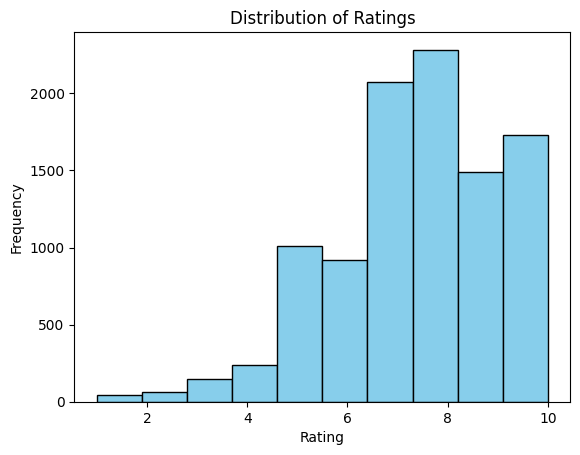

In [29]:
import matplotlib.pyplot as plt

plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
#Most of the ratings are between 6 and 8

Bar chart of top 10 titles by rating

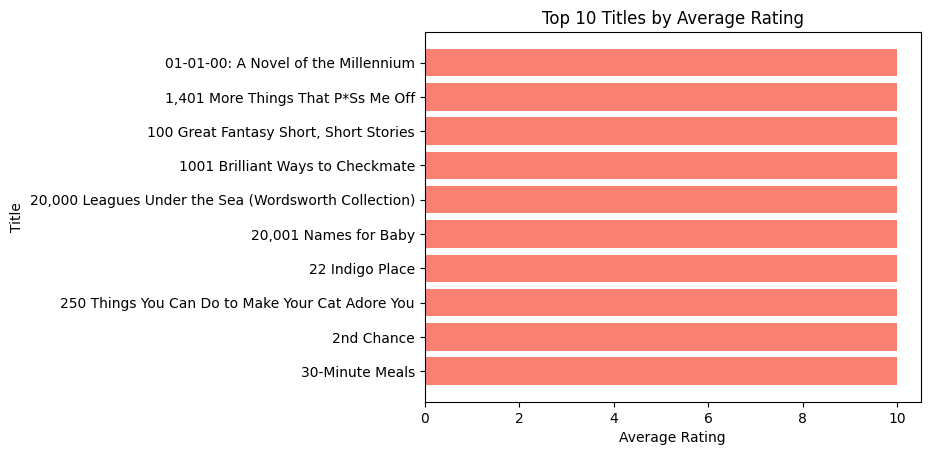

In [30]:
top_titles = df.groupby('Title')['Rating'].mean().nlargest(10)
plt.barh(top_titles.index, top_titles.values, color='salmon')
plt.xlabel('Average Rating')
plt.ylabel('Title')
plt.title('Top 10 Titles by Average Rating')
plt.gca().invert_yaxis()
plt.show()
#These 10 have the most rating


Box plot of Rating distribution:

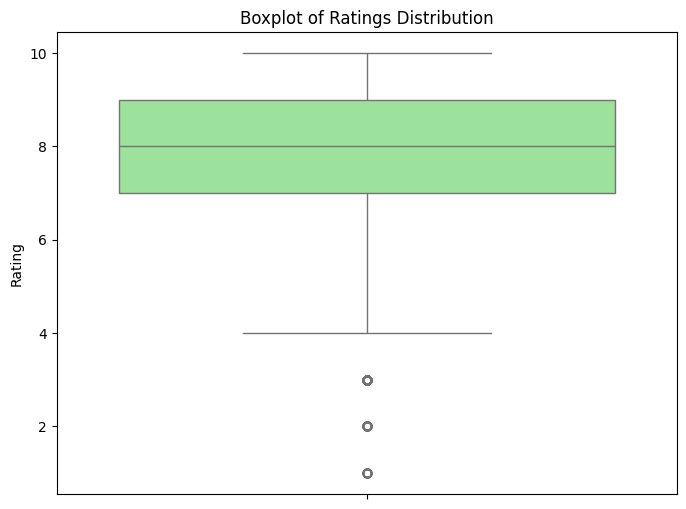

In [31]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Rating', color='lightgreen')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings Distribution')
plt.show()
#There are outliers with less than the 4 rating(on the tail side of the boxplot)

In [42]:
import numpy as np

# Calculate the interquartile range (IQR)
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

# Display outliers
print("Outliers in the dataset:")
print(outliers)


Outliers in the dataset:
          ID                                              Title  Rating
1     276729                                       Clara Callan       3
19    276762               Beloved (Plume Contemporary Fiction)       3
115   276853                                  A Kiss Remembered       1
144   276866                                               Hush       3
148   276866                                            Rebecca       3
...      ...                                                ...     ...
9855  162052  The End Of The Dream The Golden Boy Who Never ...       3
9861  162052                  Soon to Be a Major Motion Picture       2
9931  162052                          The Mediterranean Kitchen       2
9942  162052  The Concrete Enema: And Other News of the Weir...       2
9948  162052                                       Leaving Home       1

[252 rows x 3 columns]


Count plot of Ratings:

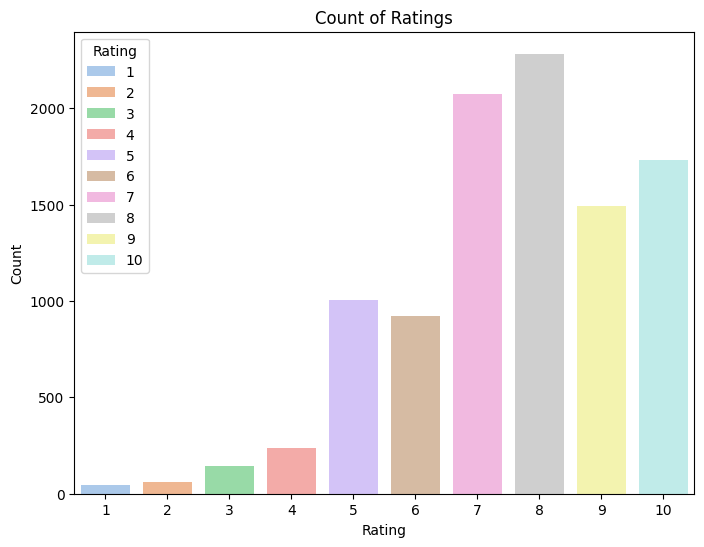

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating', palette='pastel',hue='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.show()


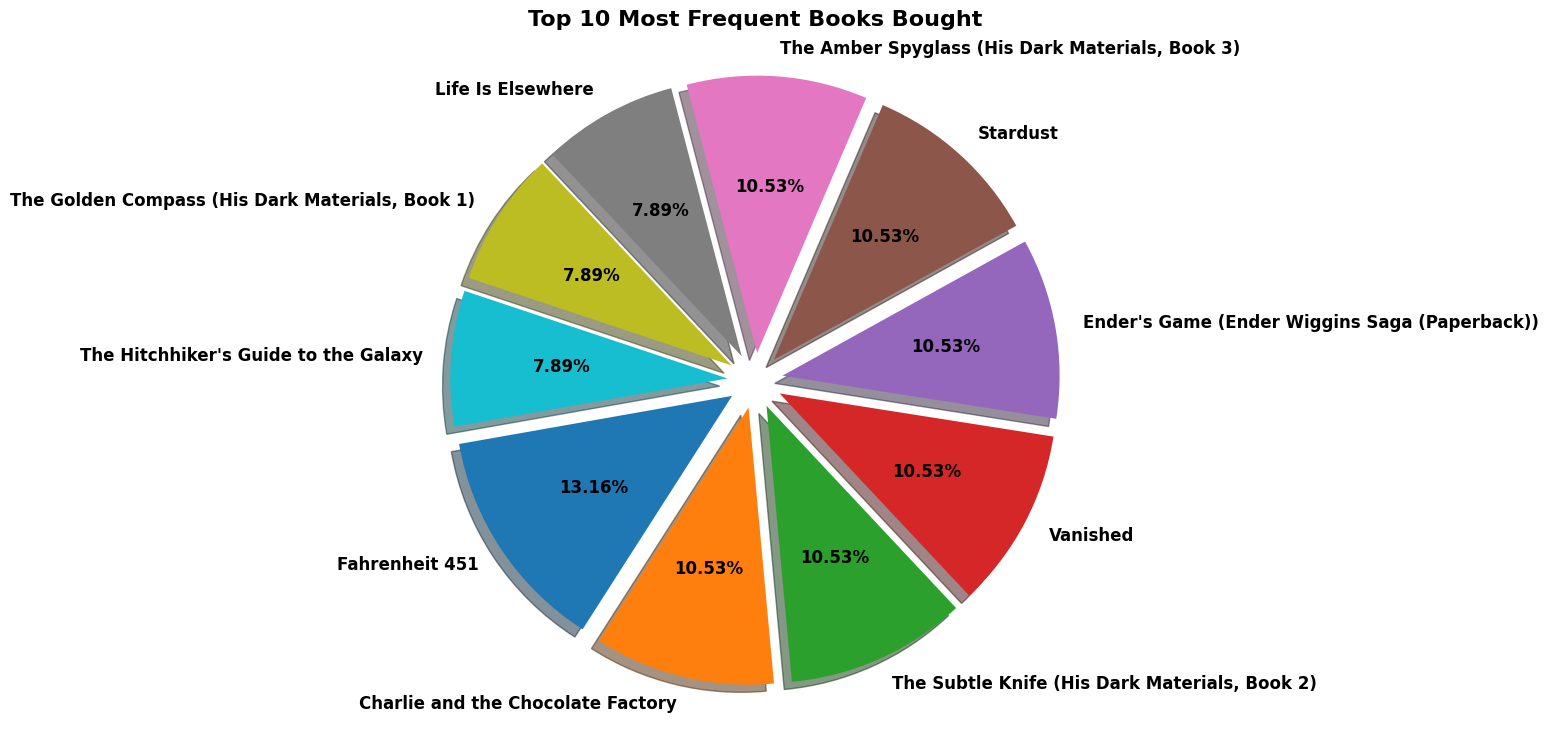

In [48]:
top_books = df['Title'].value_counts().head(10)

plt.figure(figsize=(16, 9))
plt.pie(top_books,
        labels=top_books.index,
        explode=[0.1] * len(top_books),  # Explode all slices equally
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'color': 'black'})
plt.title("Top 10 Most Frequent Books Bought", fontsize=16, fontweight='bold')
plt.show()


In [9]:

# Creating a Tfidf Vectorizer to remove all stop words
tfidf = tfid(stop_words="english")    #taking stop words from tfid vectorizer 



# Recommendation System Using Cosine Similarity

In [49]:
# Preparing the Tfidf matrix by fitting and transforming
#Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix = tfidf.fit_transform(book["Book.Title"])
tfidf_matrix.shape 



(10000, 11435)

In [52]:
# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linker(tfidf_matrix,tfidf_matrix)

# creating a mapping of name to index number 
book_index = pd.Series(book.index,index=book['Book.Title']).drop_duplicates()
book_index["American Pastoral"]




2184

In [53]:
book_index

Book.Title
Classical Mythology                                                                                      0
Clara Callan                                                                                             1
Decision in Normandy                                                                                     2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It       3
The Mummies of Urumchi                                                                                   4
                                                                                                      ... 
American Fried: Adventures of a Happy Eater.                                                          9995
Cannibal In Manhattan                                                                                 9996
How to Flirt: A Practical Guide                                                                       9997
Twilight                  

In [56]:
def get_books(Name,topN):
    #topN = top x books user wants to be recommended
    # Getting the book index using its title 
    book_id = book_index[Name]
    
    # Getting the pair wise similarity score for all the book with that book 
    cosine_scores = list(enumerate(cosine_sim_matrix[book_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    
    # Get the scores of top 10 most similar book
    cosine_scores_10 = cosine_scores[0:topN+1]
    
    # Getting the books by index 
    book_idx  =  [i[0] for i in cosine_scores_10]
    book_scores =  [i[1] for i in cosine_scores_10]
    
    # Similar book
    book_same = pd.DataFrame(columns=["name","Score"])
    book_same["name"] = book.loc[book_idx,"Book.Title"]
    book_same["Score"] = book_scores
    book_same.reset_index(inplace=True)  
    book_same.drop(["index"],axis=1,inplace=True)
    print (book_same)
    


In [59]:
# Enter your book and number of books to be recommended 
get_books("Keepers of the Earth Teachers Guide",topN=10)

                                                 name     Score
0                 Keepers of the Earth Teachers Guide  1.000000
1                                The Keepers of Truth  0.484194
2                                       Here on Earth  0.422874
3                                 A Fire in the Earth  0.422874
4                                   The Call of Earth  0.422874
5                                     The Earth House  0.314461
6   Down to Earth: The Year of the Cornflake (Down...  0.312932
7   Including Students with Special Needs: A Pract...  0.306471
8                                          GOOD EARTH  0.305113
9                                          GOOD EARTH  0.305113
10                          The Legend That Was Earth  0.274302
